# Plotting structural data on a stereonet and fitting a girdle to determine an overall fold axis

This notebook demonstrates how to us the package ```mplstereonet``` to plot structural data.

## Installing the Python package mplstereonet

If you have not previously installed mplstereonet or cartopy, run the cells below to install them.

In [ ]:
!pip install mplstereonet
!pip install cartopy

Import needed scientific Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet

from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

## Example stereonet

This stereonet is the example shown with the mplstereonet package (https://mplstereonet.readthedocs.io/en/latest/examples/basic.html).

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_97542/2854515049.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


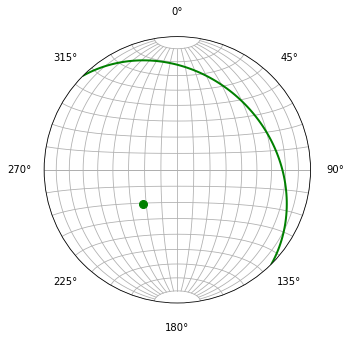

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='stereonet')

strike, dip = 315, 30
ax.plane(strike, dip, color='g', linewidth=2)
ax.pole(strike, dip, color='g', markersize=8)
ax.grid()
fig.tight_layout()
plt.savefig('./code_output/example_stereonet.pdf')
plt.show()

## Import your plane measurement data

Replace the path for ```plane_file``` here with the path to your plane.csv file. The code imports the data into a Pandas dataframe which is a useful way to manipulate the data.

In [34]:
plane_file = '/Users/penokean/EPS118_Fielddata/project1.fm/plane.csv'
planes = pd.read_csv(plane_file)
planes.head()

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,planeType,dip,dipAzimuth,strike,declination,rockUnit,timedate,notes
0,6cbf5bc8b7b06571d19beae63fe9ab35,Locality 1,2bf3d45473c42e018f843dad7783fef9,594773.897980,4.041103e+06,36.510580,-121.941601,10S,6.733910,5.0,3.0,Bedding,76.0,6.0,276.0,12.748,Carmelo,Fri Jun 3 15:20:37 2022,
1,6cbf5bc8b7b06571d19beae63fe9ab35,Locality 1,fc285a4129dff27fe93ddfcbed7ae879,594673.862667,4.041250e+06,36.511922,-121.942700,10S,6.024162,5.0,4.0,Bedding,69.0,16.0,286.0,12.748,Carmelo,Fri Jun 3 15:07:02 2022,
2,6cbf5bc8b7b06571d19beae63fe9ab35,Locality 1,bb69ddcd629587f8470a796c23a7d6c0,594642.280338,4.041280e+06,36.512192,-121.943049,10S,4.904472,5.0,4.0,Bedding,75.0,336.0,246.0,12.748,Carmelo,Fri Jun 3 15:04:17 2022,
3,6cbf5bc8b7b06571d19beae63fe9ab35,Locality 1,c4a53d5c6dc1ace485755051acdbf2f2,594605.000841,4.041287e+06,36.512259,-121.943464,10S,4.267540,5.0,3.0,Bedding,52.0,6.0,276.0,12.748,Carmelo,Fri Jun 3 15:00:26 2022,
4,6cbf5bc8b7b06571d19beae63fe9ab35,Locality 1,87978cc65694cc181a8fe5f8cad1bfa0,594579.892837,4.041271e+06,36.512119,-121.943747,10S,5.590904,5.0,3.0,Bedding,62.0,19.0,289.0,12.748,Carmelo,Fri Jun 3 14:53:33 2022,


Let's check out what columns are available from the data that you collected in Fieldmove.

In [4]:
planes.columns

Index(['localityId', ' localityName', ' dataId', ' x', ' y', ' latitude',
       ' longitude', ' zone', ' altitude', ' horiz_precision',
       ' vert_precision', ' planeType', ' dip', ' dipAzimuth', ' strike',
       ' declination', ' rockUnit', ' timedate', ' notes'],
      dtype='object')

## Let's make a simple map to show where the data were collected

In [5]:
print(planes[' latitude'].min())
print(planes[' latitude'].max())
print(planes[' longitude'].min())
print(planes[' longitude'].max())

36.507295
36.522593
-121.949743
-121.934653


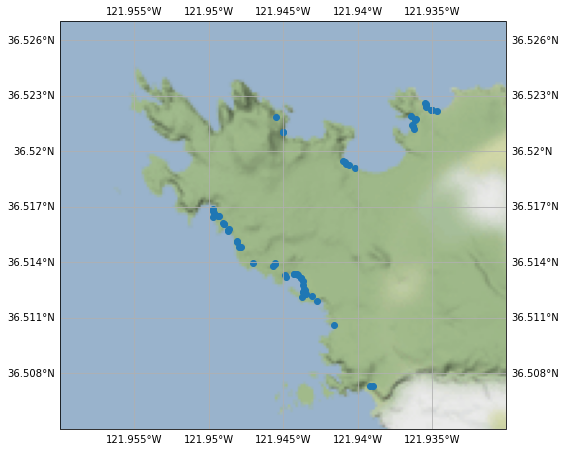

In [32]:
# # Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure(figsize=(8,8))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-121.96, -121.93, 36.505, 36.527], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 13)

ax.scatter(planes[' longitude'],planes[' latitude'],
           transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
plt.show()

## Filter by type of plane

Let's list the types of planes that we measured

In [7]:
planes[' planeType'].unique()

array([' Bedding', ' Fault', ' Igneous foliation'], dtype=object)

We can filter by the plane type to make a new dataframe called bedding_planes

In [35]:
bedding_planes = planes[planes[' planeType'] == ' Bedding']
fault_planes = planes[planes[' planeType'] == ' Fault']

## Plot bedding measurements

We can now plot all the planes on a stereonet.

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_97542/718374334.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


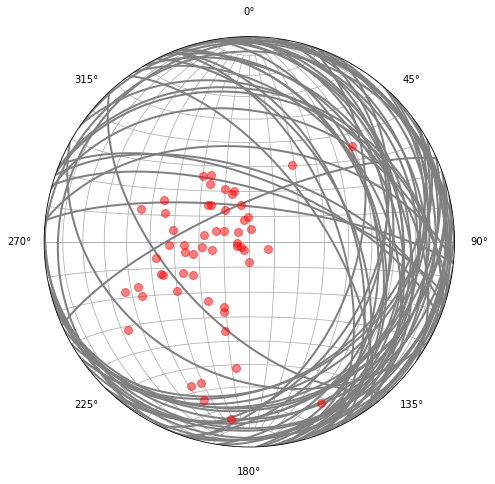

In [9]:
strikes = bedding_planes[' strike']
dips = bedding_planes[' dip']

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strikes, dips, color='grey', linewidth=2)
ax.pole(strikes, dips, color='red', markersize=8, alpha=0.5)
ax.grid()
fig.tight_layout()

plt.show()

## Filter data by location

Often it makes sense to group data by subregion. The code below splits the data based on latitude

In [10]:
north_planes = bedding_planes[bedding_planes[' latitude'] > 36.5125]
south_planes = bedding_planes[bedding_planes[' latitude'] < 36.5125]

We can plot the data so that it is colored by these two subgroups.

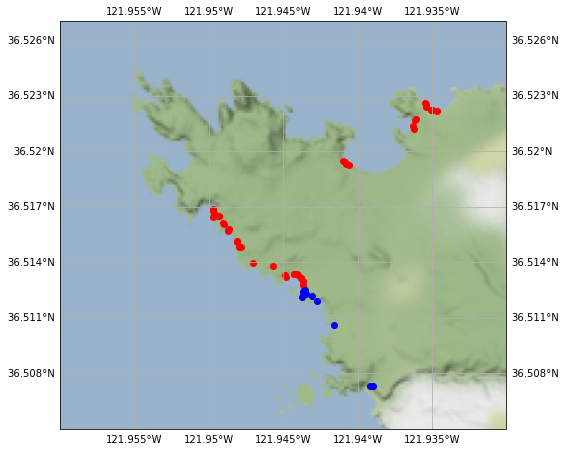

In [11]:
# # Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure(figsize=(8,8))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-121.96, -121.93, 36.505, 36.527], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 13)

ax.scatter(north_planes[' longitude'],north_planes[' latitude'],
           transform=ccrs.PlateCarree(), color='red')
ax.scatter(south_planes[' longitude'],south_planes[' latitude'],
           transform=ccrs.PlateCarree(), color='blue')
ax.gridlines(draw_labels=True)
plt.show()

## We can plot data for the northern subgroup

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_97542/933348430.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


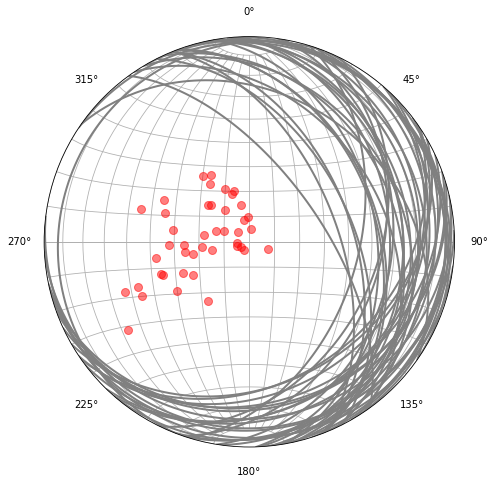

In [12]:
strikes = north_planes[' strike']
dips = north_planes[' dip']

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strikes, dips, color='grey', linewidth=2)
ax.pole(strikes, dips, color='red', markersize=8, alpha=0.5)
ax.grid()
fig.tight_layout()
plt.show()

## Fitting girdle to poles

In EPS 101, we learned how we can determine a fold axis by fitting a girdle to poles to bedding planes and taking the pole to the girdle.

## Example

Here is the example of how to do this provided with the mplstereonet documention (https://mplstereonet.readthedocs.io/en/latest/examples/fit_girdle_example.html):

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_97542/2911904716.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


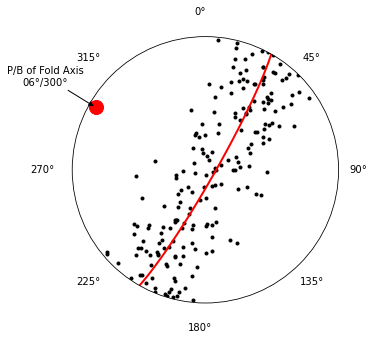

In [24]:
# Generate a random girdle distribution from the plunge/bearing of a fold hinge
# In the end, we'll have strikes and dips as measured from bedding in the fold.
# *strike* and *dip* below would normally be your input.
num_points = 200
real_bearing, real_plunge = 300, 5
s, d = mplstereonet.plunge_bearing2pole(real_plunge, real_bearing)
lon, lat = mplstereonet.plane(s, d, segments=num_points)
lon += np.random.normal(0, np.radians(15), lon.shape)
lat += np.random.normal(0, np.radians(15), lat.shape)
strike, dip = mplstereonet.geographic2pole(lon, lat)

# Plot the raw data and contour it:
fig, ax = mplstereonet.subplots()
ax.pole(strike, dip, marker='.', color='black')

# Fit a plane to the girdle of the distribution and display it.
fit_strike, fit_dip = mplstereonet.fit_girdle(strike, dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

# Add some annotation of the result
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (bearing,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'P/B of Fold Axis\n{:02.0f}\u00b0/{:03.0f}\u00b0'
ax.annotate(template.format(plunge, bearing), ha='center', va='bottom',
            xy=(lon, lat), xytext=(-50, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))
plt.tight_layout()
plt.savefig('./code_output/example_girdle.png')
plt.show()

We can do the same type of analysis on our data.

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_97542/3122013859.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


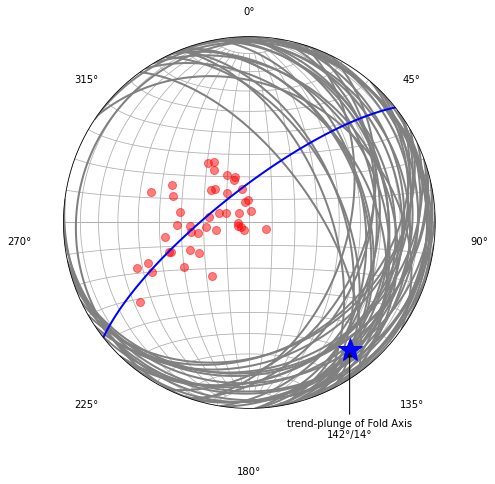

In [19]:
strikes = north_planes[' strike']
dips = north_planes[' dip']

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strikes, dips, color='grey', linewidth=2)
ax.pole(strikes, dips, color='red', markersize=8, alpha=0.5)

fit_strike, fit_dip = mplstereonet.fit_girdle(strikes, dips)
ax.plane(fit_strike, fit_dip, color='blue', lw=2)
ax.pole(fit_strike, fit_dip, marker='*', color='blue', markersize=25)

# Add some annotation of the result
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (trend,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'trend-plunge of Fold Axis\n{:02.0f}\u00b0/{:02.0f}\u00b0'
ax.annotate(template.format(trend, plunge), ha='center', va='bottom',
            xy=(lon, lat), xytext=(0, -90), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))

ax.grid()
fig.tight_layout()
plt.show()

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_97542/3551018369.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


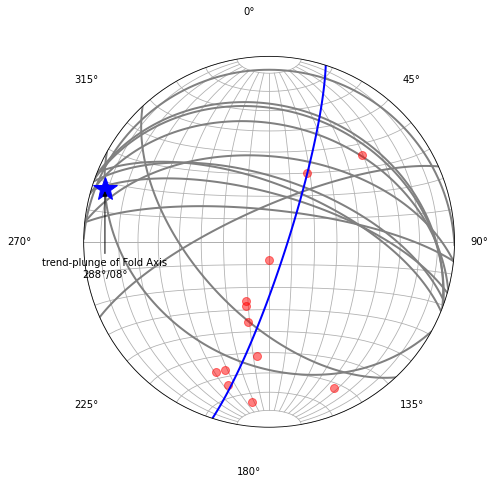

In [25]:
strikes = south_planes[' strike']
dips = south_planes[' dip']

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strikes, dips, color='grey', linewidth=2)
ax.pole(strikes, dips, color='red', markersize=8, alpha=0.5)

fit_strike, fit_dip = mplstereonet.fit_girdle(strikes, dips)
ax.plane(fit_strike, fit_dip, color='blue', lw=2)
ax.pole(fit_strike, fit_dip, marker='*', color='blue', markersize=25)

# Add some annotation of the result
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (trend,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'trend-plunge of Fold Axis\n{:02.0f}\u00b0/{:02.0f}\u00b0'
ax.annotate(template.format(trend, plunge), ha='center', va='bottom',
            xy=(lon, lat), xytext=(0, -90), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))

ax.grid()
fig.tight_layout()
plt.show()